Ce premier notebook renvoie à la partie 0.1.5  
**« Enjeu de granularité : coexistence de témoins dans un même manuscrit »**.


# Partie I : Comparaison entre le nombre de témoins et de manuscrits

Voir le nombre de témoins par auteur. Il suffit de charger les données, puis d’appliquer la fonction `value_counts()` sur la colonne des auteurs pour obtenir le nombre de témoins par auteur, chaque occurrence du nom d’auteur correspondant à un témoin.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger nos données
file_path = Path('../data/wits_table_tot.xlsx')

df = pd.read_excel(file_path, engine='openpyxl')

# Compter le nombre total de témoins par auteur
witness_count_total = df['workAuthor'].value_counts()
print(witness_count_total)




Prudence                  522
Eutrope                    92
Orose                      89
Juvence                    77
Potamius de Lisbonne       76
Grégoire d’Elvire          70
Pastor de Galice           59
Bachiarius                 59
Avitus de Braga            55
s2_GregoireElvire          38
an_fidessanctiambrosii     37
Pacien de Barcelone        32
an_dialogusquaestionum     31
Consentius                 27
Priscillien                22
s1_GregoireElvire          16
Montanus de Tolède         15
s4_Priscillien             12
Syagrius                   10
s1_Orose                    8
s1_Sévère                   7
Sévère de Minorque          7
Idace                       6
Egeria?                     5
Valérien de Calahorra       4
Mérobaude                   4
s1_Ossius                   3
Turibius d’Astorga          3
Vincent de Huesca           2
Ossius de Cordoue           2
s6_Priscillien              2
s2_Ossius                   1
s1_Priscillien              1
s2_Priscil

Pour compter le nombre de manuscrits, on commence par supprimer les doublons afin qu’un même manuscrit ne soit compté qu’une seule fois par auteur. Une fois le nombre de manuscrits uniques par auteur calculé, on le compare au nombre total de témoins. Les résultats sont regroupés dans un DataFrame formaté pour Seaborn, puis visualisés dans un graphique à barres.


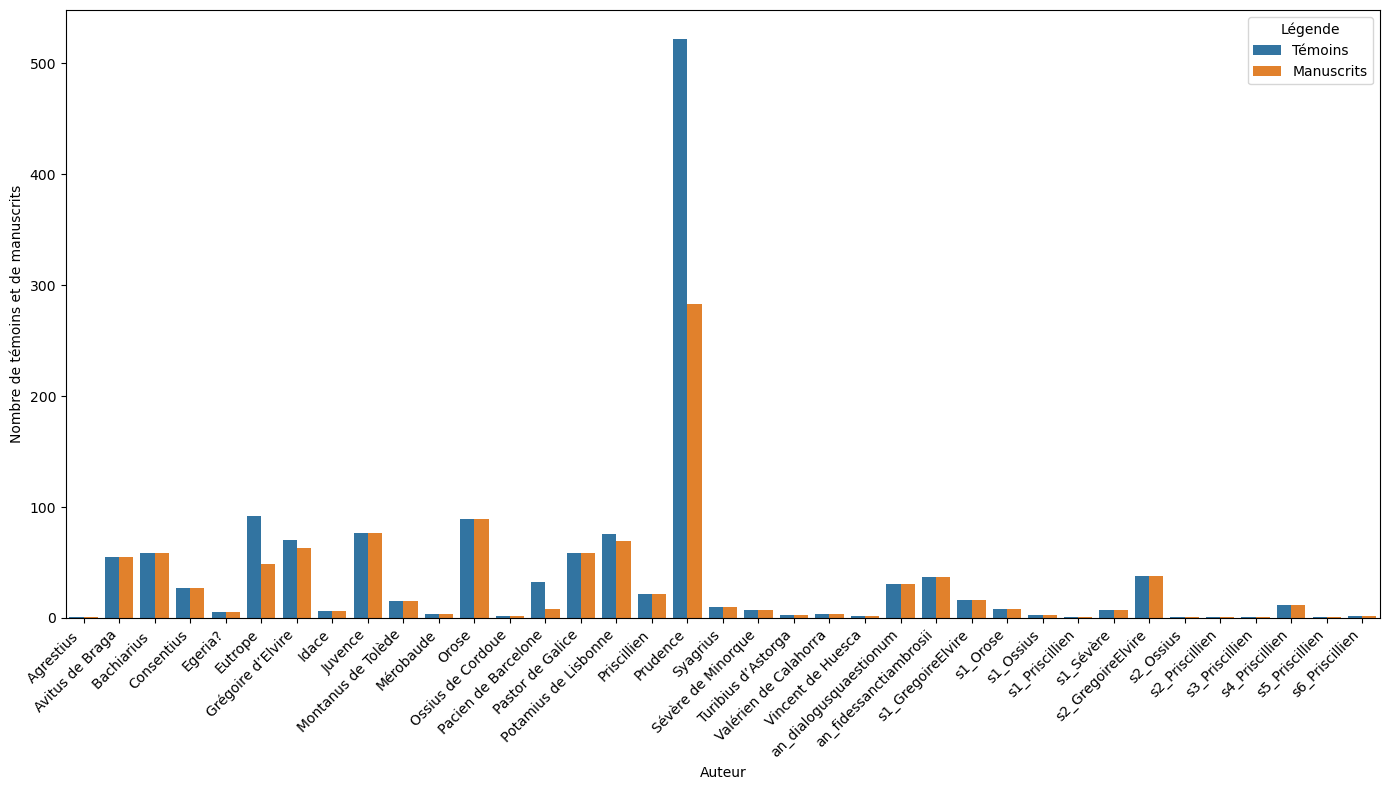

In [2]:

# Suppression des doublons : un même manuscrit ne doit être compté qu'une fois par auteur
df_unique_witnesses = df.drop_duplicates(subset=['workAuthor', 'witSignature'])

# Comptage des manuscrits par auteur
witness_count_unique = df_unique_witnesses['workAuthor'].value_counts()

# Regroupement dans un DataFrame pour Seaborn
combined_counts = pd.DataFrame({
    'Témoins': witness_count_total,
    'Manuscrits': witness_count_unique
}).fillna(0).reset_index().melt(id_vars='index', var_name='Légende', value_name='Nombre')
combined_counts.rename(columns={'index': 'Auteur'}, inplace=True)

# Visualisation avec Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_counts, x='Auteur', y='Nombre', hue='Légende')
plt.xlabel('Auteur')
plt.ylabel('Nombre de témoins et de manuscrits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("graphique_temoins_physical_seaborn.png")
plt.show()

Enfin, on filtre uniquement les auteurs pour lesquels le nombre de manuscrits et de témoins diffèrent. 


                      Témoins  Manuscrits
Eutrope                    92          49
Grégoire d’Elvire          70          63
Pacien de Barcelone        32           8
Potamius de Lisbonne       76          69
Prudence                  522         283


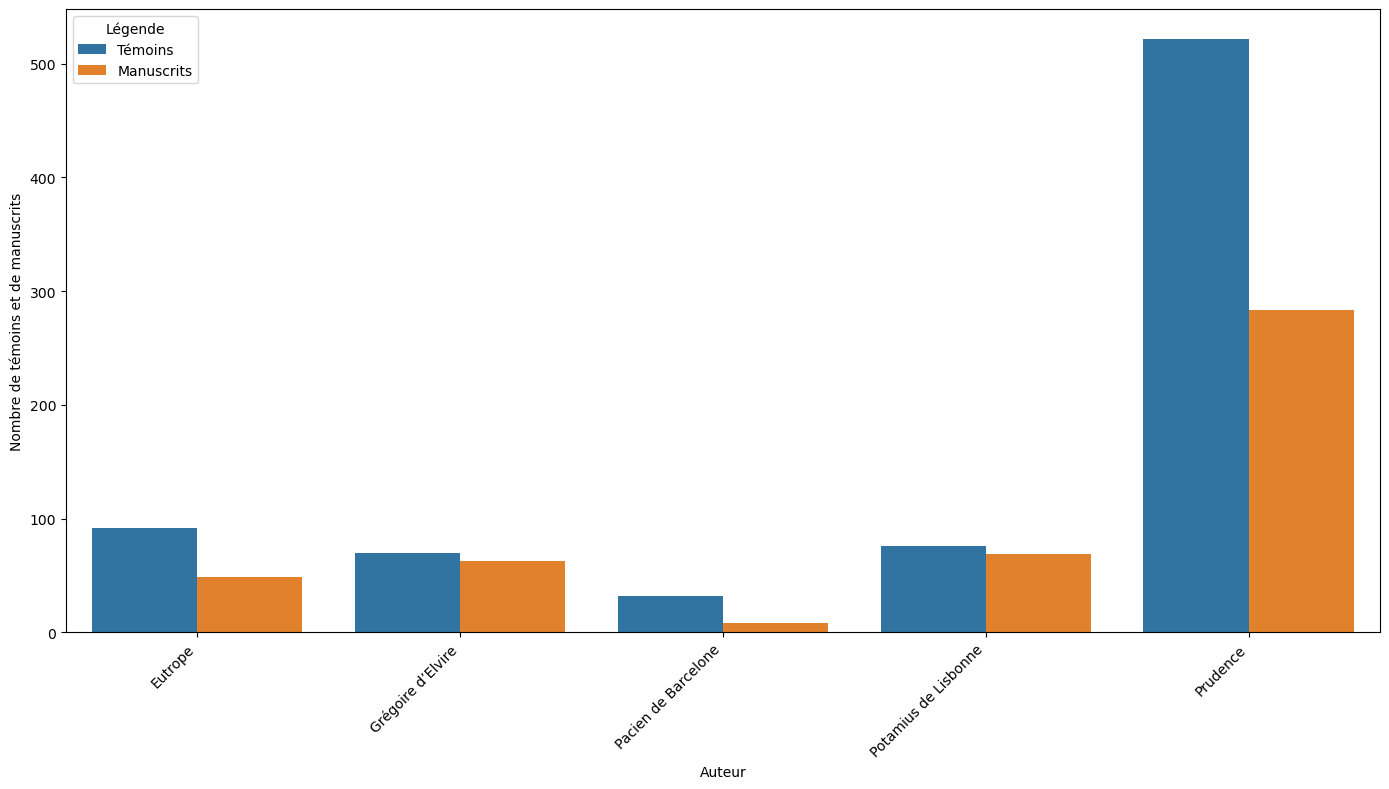

In [ ]:

# Garder uniquement les auteurs avec des différences entre le nombre de copies et de manuscrits
difference = comparison[comparison['Témoins'] != comparison['Manuscrits']]
print(difference)

# Regrouper dans un DataFrame pour Seaborn
combined_counts = difference.reset_index().melt(id_vars='index', var_name='Légende', value_name='Nombre')
combined_counts.rename(columns={'index': 'Auteur'}, inplace=True)

# Visualisation avec Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_counts, x='Auteur', y='Nombre', hue='Légende')
plt.xlabel('Auteur')
plt.ylabel('Nombre de témoins et de manuscrits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("graphique_temoins_physical_seaborn.png")
plt.show()

# Partie II : Identification des manuscrits dupliqués pour un auteur donné

In [ ]:
# Choisir un auteur (ex. 'Potamius de Lisbonne')
auteur_cible = 'Potamius de Lisbonne'

# Filtrer les données pour cet auteur
df_auteur = df[df['workAuthor'] == auteur_cible]

# Trouver les manuscrits apparaissant plusieurs fois
doublons = df_auteur[df_auteur.duplicated(subset='witSignature', keep=False)]

# Afficher uniquement le manuscrit et l'œuvre
doublons_affichage = doublons[['witSignature', 'workTitle']].sort_values(by='witSignature')

# Affichage
print(f"Doublons pour l’auteur {auteur_cible} :")
print(doublons_affichage)


# Optionnel : enregistrement des résultats dans un fichier csv pour une meilleure lisibilité

# Définir le chemin de sortie
dossier_sortie = r"C:\Users\Guidi\Desktop\Memoire"
nom_fichier = f"doublons_{auteur_cible.replace(' ', '_').replace('.', '')}.xlsx"
output_path = os.path.join(dossier_sortie, nom_fichier)

# Créer le dossier s’il n’existe pas
os.makedirs(dossier_sortie, exist_ok=True)

# Sauvegarde dans un fichier Excel
doublons_affichage.to_excel(output_path, index=False, engine='openpyxl')
print(f"Les doublons ont été sauvegardés dans : {output_path}")



Doublons pour l’auteur Potamius de Lisbonne :
                                          witSignature  \
618  Vaticano, Biblioteca Apostolica Vaticana, Arch...   
630  Vaticano, Biblioteca Apostolica Vaticana, Arch...   
611  Vaticano, Biblioteca Apostolica Vaticana, Urb....   
627  Vaticano, Biblioteca Apostolica Vaticana, Urb....   
623  Vaticano, Biblioteca Apostolica Vaticana, Vat....   
635  Vaticano, Biblioteca Apostolica Vaticana, Vat....   
622  Vaticano, Biblioteca Apostolica Vaticana, Vat....   
634  Vaticano, Biblioteca Apostolica Vaticana, Vat....   
617  Vaticano, Biblioteca Apostolica Vaticana, Vat....   
629  Vaticano, Biblioteca Apostolica Vaticana, Vat....   
621  Venezia, Biblioteca Nazionale di San Marco, la...   
633  Venezia, Biblioteca Nazionale di San Marco, la...   
620               Verona, Biblioteca Civica, 798(2007)   
632               Verona, Biblioteca Civica, 798(2007)   

                        workTitle  
618                     De Lazaro  
630  De mar